In [1]:
import os

In [2]:
#| output: false
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import pickle
#import itables
pio.templates.default = "plotly_white"
# df_kaggle = pd.read_csv("mbti_1.csv")
file_names = [
    "plot_fraud_over_time.pkl"
]
def _load(path):
    with open(path,'rb') as f:
        rtn = pickle.load(f)
    return rtn 
    
#figs = {fname.replace('.pkl',''): _load(f'./{fname}') for fname in file_names}


# Contents 

- Introduction

- Related studies

- Data Description

- Proposed method

- Real data analysis


# Introduction

## Introduction


- With the advancement of information technology (IT), many countries are reducing the use of cash and opting for credit cards. According to the '2021 Survey on Cash Usage Behavior by Economic Entities' announced by the Bank of Korea in 2022 (which is conducted every three years), the proportion of cash usage in South Korea has dropped significantly. 

::: {.notes}

- IT 등 정보기술의 발달로 많은 나라가 현금의 사용을 줄이고 신용 카드를 이용해 사용하고 있다. 우리나라도 2022년 한국은행이 발표한 '2021년 경제주체별 현금사용행태 조사'*(3년 마다 진행되는 조사)결과에 따르면, 현금 사용 비중은 2015년 38.8%에서 2018년 32.1%로 하락한 뒤 이번에 처음으로 20%대로 낮아졌다. 반면 신용·체크카드 비중은 2015년 37.4%, 2018년 52.0%, 2021년 58.3%로 증가했다.(출처: 한국은행-2021년 경제주체별 현금사용행태 조사 결과)

:::

## Introduction

![Figure 1: 2021 Survey on Cash Usage Behavior by Economic Entities](./figure/F1.png){width=70%}

::: {.notes}

우리나라도 2022년 한국은행이 발표한 '2021년 경제주체별 현금사용행태 조사'*(3년 마다 진행되는 조사)결과에 따르면, 현금 사용 비중은 2015년 38.8%에서 2018년 32.1%로 하락한 뒤 이번에 처음으로 20%대로 낮아졌다. 반면 신용·체크카드 비중은 2015년 37.4%, 2018년 52.0%, 2021년 58.3%로 증가했다.(출처: 한국은행-2021년 경제주체별 현금사용행태 조사 결과)


- Cash usage decreased from 38.8% in 2015 to 32.1% in 2018, and for the first time, it fell into the 20% range. In contrast, the proportion of credit and debit card usage increased from 37.4% in 2015 to 52.0% in 2018, and further to 58.3% in 2021.

:::

> 다른 영어 논문에서 놓운고 하깅

## Introduction

- As cash liquidity decreases, transactions through virtual currencies, cards, and other electronic means are on the rise. While the use of credit cards offers convenience for consumers and facilitates analysis of spending patterns, it also raises concerns about card fraud. If card issuers and consumers fail to detect fraudulent transactions, it can lead to significant financial losses.

::: {.notes}

- 현금의 유동성은 감소하고 가상 화폐, 카드 등의 거래가 커지고 있는 셈이다. 신용카드의 사용은 소비자의 거래 편리성을 제공하고 소비 패턴을 분석하는데 있어 용이하지만, 카드 사기 거래를 야기시킨다. 이에 카드 발급기관 및 소비자는 카드의 사기거래를 파악하지 못하게 되면 커다란 금융 피해를 야기하게 된다. 

:::

## Introduction

- Various studies have been conducted to detect fraudulent transactions in the past. These studies focused on learning and analyzing transaction amounts to identify fraudulent transactions. This assumption treats each transaction independently, making it difficult to determine individual fraudulent activities.

::: {.notes}

- 기존의 사기거래 여부를 파악하기 위해서 다양한 연구가 진행되어 왔다. 해당 연구는 사기 거래 파악을 위해 거래 금액에 집중하여 학습하고 분석하였다. 이러한 가정은 각 거래를 독립적으로 보므로 개인의 사기거래 여부 파악이 어렵다. 
:::

## Introduction

- Now, let's consider what happens if each transaction is not independent. Suppose a consumer loses their card; until the loss is detected, the card can be used for fraudulent transactions. In this study, when grouping the data by customer and visualizing it over time, the results appear as follows.

::: {.notes}

- 각 거래가 독립적이지 않다면, 어떻게 될지 간단하게 생각해보자. 소비자가 카드를 분실하는 경우, 분실 여부를 알기 전까지 카드는 사기 거래에 사용된다. 본 연구에서 사용할 데이터를 고객별로 그룹핑하고, 시간에 따라 시각화 해 본 결과 아래와 같이 나타난다.

:::

## Introduction

- 그.. 그림파일? 보여주는거 어떻게 할지 생각쓰
![](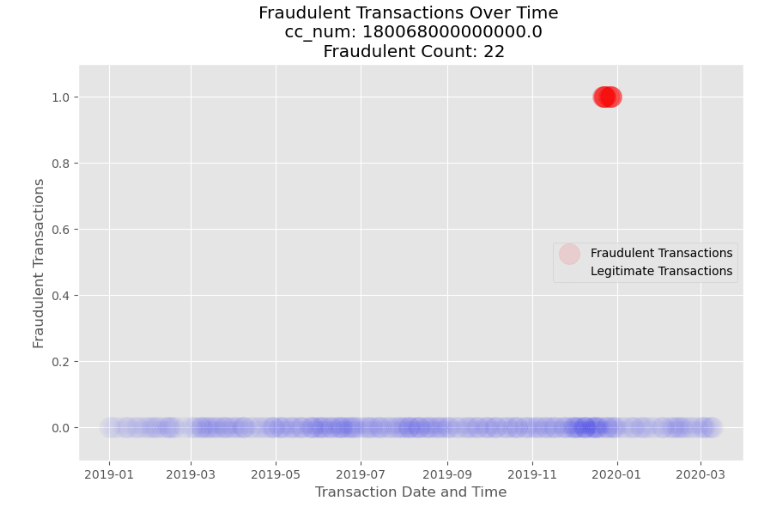)

::: {.notes}

- 

:::

## Introduction

::: {.panel-tabset}

#### Introduction

- In graph-based analysis, there are bipartite graphs and tripartite graphs. Bipartite graphs have difficulty detecting anomalies in individual transactions. Tripartite graphs allow for easier analysis at the individual level, but they are time-consuming and complex.

#### bipartite graph

![Figure 3:An example of a bipartite graph](./figure/F2.png){width=70%}

#### tripartite graph

![Figure 4:An example of a tripartite graph](./figure/F3.png){width=70%}
:::

::: {.notes}

- 그래프 기반 분석 방법으로는 이분형 그래프와 삼분형 그래프가 있다. 이분형 그래프는 개별 거래의 이상치 탐지에 어려움이 있다. 삼분형은 개별 수준의 분석이 용이하지만 거래 시간이 오래 걸리고 복잡하다는 단점이 있다.

:::

## Introduction

Therefore, in this study, we propose a method to enhance the connectivity of graphs using the time differences between transactions. Through this method, we aim to address the following questions:

1. Is it easier to identify individual transactions compared to non-graph-based research methods?

2. Is it simpler compared to graph-based research methods?

::: {.notes}

이에 본 연구에서는 거래 간 시간 차이를 이용해 그래프의 연결성을 향상시키는 방법을 제안하고자 한다.
이 방법을 통해 확인하고 싶은 내용은 다음과 같다.

1. 비 그래프 기반 연구 방법에 비해 개별 거래 파악이 용이한가?

- 비독립적인 연결을 고려하는게 의미가 있는가?

- 거래 금액에 의존한 분석에서 벗어날 수 있는가?

2. 기존에 제시된 그래프 기반 연구 방법에 비해 성능이 우수한가?

- 그래프 구조가 단순히 이해하기 쉽게 표현될 수 있는가?



:::

## Introduction

To begin research on fraud detection based on graph analysis, let's first understand the concept of a graph.[@wu2020comprehensive][@scarselli2008graph]

- Graph $G = (V,E)$ with $N$ nodes $i \in v$ and $|E|$ edges $(i,j) \in E$

- $A \in \mathbb{R}^{N \times N}$: adjacency matrix of $G$

- $X \in \mathbb{R}^{N \times P}$ is the matrix of node features

- The graph $G$ consists of nodes and edges denoted by $(V,E)$, where $V$ represents the set of nodes and $E$ represents the set of edges. Each node and edge has its own features.

"그래프 간단한 특성? 사진()"

::: {.notes}

그래프 관련 기반 사기 거래 탐지 연구를 위해서 먼저, 그래프에 대해 알아보자.

- Graph $G = (V,E)$ with $N$ nodes $i \in v$ and $|E|$ edges $(i,j) \in E$

- $A \in \mathbb{R}^{N \times N}$: adjacency matrix of G

- $X \in \mathbb{R}^{N \times P}$ is matrix of node features

- 그래프 G는 (V,E)로 이루어져 있고, V는 node, E는 edge의 집합이다. 각 노드와 에지는 특징을 가지고 있고 간단하게 아래와 같은 그림으로 나타낼 수 있다.

:::

# Related Studies

## Related Studies

Supervised learning methods commonly researched for fraud detection include the following techniques.


::: {.panel-tabset}

#### Case-Based Reasoning
Case-Based Reasoning is applied to reduce the number of final-line fraud investigations in the credit approval process, demonstrating that an adaptive solution can offer fraud filtering and case ordering functions, thus minimizing the required number of final-line fraud investigations.[@wheeler2000multiple]

#### Logistic regression
Logistic regression is useful for situations in which we want to be able to predict the presence or absence of a characteristic or outcome based on values of a set of predictor variables. [@shen2007application]
S는~ 이렇게 연구했따. 라고 쓰기 줄글로

#### Hidden Markov Model
Hidden Markov Model is trained with normal behavior of cardholder. If an incoming credit card transaction is not accepted by the HMM with sufficiently high probability, it is considered to be fraudulent.  [@srivastava2008credit]

#### Association rules
Association rules are utilized to extract normal behavior patterns from credit card transaction databases for detecting and preventing fraud in abnormal transactions [@sanchez2009association]

#### SVM
SVM's effectiveness lies in its ability to handle imbalanced data, such as fraud detection, by leveraging the simplicity of linear classifiers and operating in feature-rich spaces. [@bhattacharyya2011data]

:::

::: {.notes}

사기 거래 탐지 연구를 위한 지도학습 방법으로는 다음과 같은 방법이 많이 연구되어 왔다.

- 사례 기반 추론은 신용 승인 프로세스에서 최종 단계 사기 조사의 수를 줄이는 데 적용되며, 적응형 솔루션이 사기 필터링 및 사례 정렬 기능을 제공하여 최종 단계 사기 조사의 필요 수를 최소화할 수 있음을 보여준다.

- 로지스틱 회귀는 예측 변수 값에 기반하여 특성 또는 결과의 존재 또는 부재를 예측하고자 할 때 유용하다.

- HMM은 카드 홀더의 정상적인 행동으로 훈련된다. HMM에서 수신되는 신용 카드 거래가 충분히 높은 확률로 수용되지 않으면 이를 사기로 간주한다.

- 연관규칙은 비정상 거래에서 사기를 탐지하고 예방하기 위해 신용카드 거래 데이터베이스에서 정상적인 행동 패턴을 추출하는 데 활용된다.

- SVM은 선형 분류기의 간결함을 활용하고 특성이 풍부한 공간에서 작동함으로써 사기 탐지와 같은 불균형한 데이터를 작업하는 것에 활용성이 높다.

:::

## Related Studies

Research on fraud transaction detection using graph models includes the following methods.


::: {.panel-tabset}

#### Graph

A general, comprehensive, and structured overview of the state-of-the-art methods for anomaly detection in data represented as graphs. As a key contribution, we provide a comprehensive exploration of both data mining and machine learning algorithms for these {\em detection} tasks. [@akoglu2015graph]

#### GCN
Graph Convolutional Networks (GCNs) are used to capture complex relationships between transactions and detect fraudulent activities based on the graph representation of transaction data.[@kipf2016semi]

#### 

:::

::: {.notes}

사기 거래 탐지 연구를 위한 지도학습 방법으로는 다음과 같은 방법이 많이 연구되어 왔다.

- 그래프

데이터를 그래프로 표현한 경우의 이상 탐지에 대한 최신 기술 방법에 대한 일반적이고 포괄적이며 체계적인 개요를 제공한다. 주요 기여로는 이러한 탐지 작업을 위한 데이터 마이닝 및 기계 학습 알고리즘의 포괄적인 탐색을 제공한다.

:::

`-` 관련연구: 신용카드 분석 / GCN anom / 

fraud detection/  gcn 교집합이 제일 좋음[@van2015apate]

[@wang2019semi]

[@jiang2019anomaly]



# Data description

## Data description

To identify fraudulent transactions using the method proposed in this study, we first prepare a dataset related to fraudulent transactions. Data can be obtained from sites such as Kaggle, credit card transactions, and financial transaction exchanges. However, such data is anonymized to protect customer privacy and is provided for data analysis purposes. To use the method proposed in this study, unique indices (in this study, cc_num is used), time, and nodes (in this study, amt is used) are required. As mentioned earlier, other datasets without indices or time are difficult to use in this study.


::: {.notes}


본 연구에서 제시한 방법으로 사기 거래를 파악하기 위해, 먼저 사기거래 관련 데이터셋을 준비한다. 데이터는 케글, 신용거래, 금융거래소 등의 사이트에서 얻을 수 있다. 다만 이러한 데이터들은 고객의 개인정보 보호를 위해 가명처리 되어 데이터 분석을 위해 제공된 데이터이다. 본 연구의 방법을 사용하기 위해서는 고유 index(본 연구에서는 cc_num을 사용하였다.), time, node(본 연구에서는 amt를 사용하였다.)가 필요하다. 앞서 말한 바와 같이 다른 데이터들은 index 혹은 time이 없는 데이터로 본 연구에서는 사용이 어렵다.


:::

> 데이터 표를 보여줄 필요는 없겠지!

## Data description

As mentioned earlier, since other datasets are difficult to use, this study utilizes a dataset containing credit card transaction records of European cardholders collected over one month in September 2013. It encompasses transactions that were conducted across a network of 800 merchants and includes data from
1,000 individual cardholders. Originally, this dataset is composed of 23 distinct features that offer various insights into each transaction. However, for the purposes of
this study, we have selectively utilized only a subset of these features that are deemed
most relevant to our analysis objectives.


::: {.notes}

앞서 말한 바와 같이, 다른 데이터 셋들은 사용이 어려우므로, 본 연구에서는 2013년 9월 한 달 동안 수집된 유럽 카드 소지자의 신용카드 거래 기록이 포함된 데이터 셋을 이용한다. 800개의 가맹점 네트워크에서 이루어진 거래가 포함되며 다음 데이터를 포함합니다.
1,000명의 개별 카드 소유자. 원래 이 데이터 세트는 각 거래에 대한 다양한 인사이트를 제공하는 23개의 고유한 기능으로 구성되어 있습니다. 하지만 이 연구의 목적을 위해
이 연구에서는 분석 목표와 가장 관련이 있다고 판단되는 일부 기능만
분석 목표와 가장 관련이 있다고 판단되는 일부 기능만을 선택적으로 활용했습니다.

:::

## Data description

| Variable                 | Description                                           |
|--------------------------|-------------------------------------------------------|
| index                | Identifier for each row, row number.                  |
| cc_num                | The customer's credit card number.                    |
| trans_date_and_time    | Trading hours.                                       |
|amt                   | Transaction amount.                                   |
| is_fraud               | Indicate whether the transaction is fraudulent (0: legitimate, 1: fraudulent). |

[Table 1: A list of data variables used in the study]

## Data description

> 원 데이터 표 형식으로 추가?

## Data description

> 활용 데이터 표 형식으로 추가?

# Proposed method

## Proposed method

- $\mathbf{X}$ is a matrix with $N$ rows and $\mathbf{y}$ is a vector of length $N$. 

- $\mathbf{y}$ contains labels indicating fraud presence, while $\mathbf{X}$ represents the design matrix for predicting $\mathbf{y}$. 

- We interpret the data as a graph. 

- Let $\mathcal{I}$ be the set of $\text{cc_num}$.

## Proposed method

let $\cal T_i, i \in \cal I$, be the set of transaction times for the $i$-th customer. The given data can be expressed as $\cal D:=\{(\bf X_{i,t},{\bf y}_{i,t}): i \in {\cal I}, t \in {\cal T}_i \}$. To represent the graph structure, we need to define nodes and edges. The set of nodes is defined as $\cal V = \{v_{i,t}: i \in {\cal I}, t \in {\cal T}_i \}$. Note that $|{\cal V}|=\sum_{i \in {\cal I}} |{\cal T}_i|=N$. The links between data points are defined as ${\cal E} = \bigcup_{i \in {\cal I}} \{ (v_{i,t},v_{i,s}) : t,s \in {\cal T}_i \text{ and } t\neq s \}$, considering connections only within the same customer. 

## Proposed method

For a fixed $i \in {\cal I}$, the $(t,s)$-th elements of ${\bf W}_i$ are defined as $\exp(\frac{-|t-s|_2^2}{\theta})$ where $t,s \in {\cal T}_i$, and the $N \times N$ weight matrix ${\bf W}$ is defined as the following block matrix:

${\bf W}=\begin{bmatrix}
{\bf W}_1 & {\bf 0} & {\bf 0} & \dots & {\bf 0} \\ 
{\bf 0} & {\bf W}_2 & {\bf 0} & \dots & {\bf 0} \\ 
{\bf 0} & {\bf 0} & {\bf W}_3 & \dots & {\bf 0} \\ 
\dots & \dots & \dots & \dots & \dots \\ 
{\bf 0} & {\bf 0} & {\bf 0} & \dots & {\bf W}_{|{\cal I}|}
\end{bmatrix}$

Note that if ${\bf W}={\bf I}$, it implies a classical tabular data structure rather than a graph data structure. ${\bf A}$ is the adjacency matrix corresponding to ${\bf W}$.

## Proposed method

[@kipf2016semi] To predict ${\bf y}$, we stacked graph convolution layers as follows:

$${\bf H}^{(l+1)} = \sigma\big({\bf D}^{-1/2}{\bf A}{\bf D}^{-1/2}{\bf H}^{(l)} {\bf \Theta}^{(l)}) \big)$$

Here, ${\bf D}$ is the degree matrix of ${\bf A}, {\bf \Theta}^{(l)}$ represents the learnable parameters, and $\sigma$ denotes the activation function. ${\bf H}^{(l)}$ is the input for the $l$th layer, and ${\bf H}^{(l+1)}$ is the output, where for $l=0, {\bf H}^{(0)}={\bf X}$, and the output of the final layer is defined as ${\bf y}$.


# Experimental Research

## Experiment 1


### Conditions

Credit card data is notorious for its highly imbalanced nature, especially regarding fraudulent transactions. In the dataset utilized for this study, the ratio of fraudulent transactions is 0.00573. Due to the extremely low proportion of fraudulent transactions, employing graph-based methods on the entire dataset might result in significant computational overhead, as the size of the graph would be substantial.


## Experiment 1


### Conditions

To mitigate computational complexity, this study proposes to compare the performance of the original dataset with down-sampled data using PyOD or deep learning methods. By comparing the results of experiments conducted on the original dataset and the down-sampled dataset, if the performance on the down-sampled dataset surpasses that of the original dataset, it suggests that the proposed method, as well as the down-sampling technique, is effective.




## Experiment 1


### Conditions

Through this comparative analysis, it is anticipated that the down-sampling method could potentially outperform the original dataset, validating its efficacy as a viable approach for addressing imbalanced data issues in credit card fraud detection.




::: {.notes}


### 실험1-조건
신용카드 데이터는 사기 거래의 불균형이 심한 데이터이다.  본 연구에서 활용하는 데이터의 사기 거래 비율은 0.00573이다. 사기 거래 비율이 굉장히 작기 때문에 전체 데이터를 활용하는 데 있어 graph를 활용해 제안한 방법으로 실험을 돌리게 되면 edge의 크기가 커져 실험 시간이 오래 걸릴 수 있다. 이에, Pyod나 딥러닝 방법을 통해 원 데이터의 실험과 다운 샘플링 한 데이터의 실험 결과와 비교하고자 한다. 다운 샘플링 한 데이터의 실험 결과가 원 데이터의 실험 결과보다 좋은 경우 제안한 방법 또한 다운 샘플링 한 방법이 좋을 것이다. 


:::

## Experiment 1


### Experimet Results

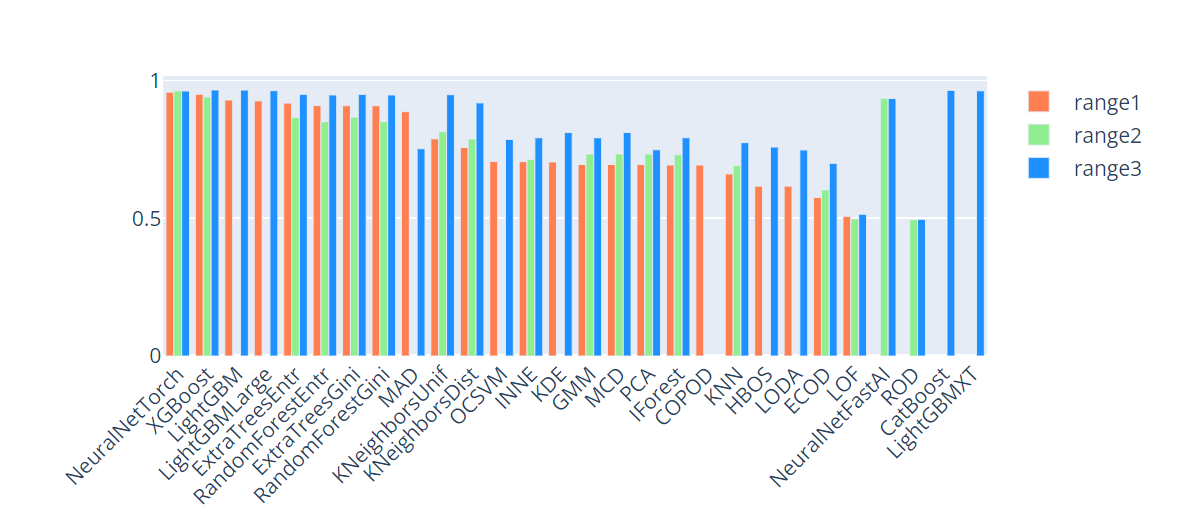




::: {.notes}


### 실험1-결과
ㅜㅜ 왜 자꾸 블로그 업로드가 안되지? commit 가 안되는데 무튼...
위의 결과를 통해 다운샘플링 한게 잘 보인다는거 보여주고 싶음

:::

## Experiment 2


### Conditions




::: {.notes}


### 실험2

:::

## Experimetal setting

## Experimet

::: {.panel-tabset}

#### Proposed method

Performance of proposed method across different fraud rates in training data

#### Autogluon

Performance of Autogluon method across different fraud rates in training data


#### Pyod

Performance of Pyod method across different fraud rates in training data
:::

# Conclusion and Discussion

# Reference